In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [12]:
# Helper Plotting Functions
def plot(x, Y, labels, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        plt.plot(x, Y[i], label=labels[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_SNR(x, Sim, Theo, Sim_labels, Theo_labels, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(Sim_labels)):
        plt.plot(x, Sim[i], marker="o", label=Sim_labels[i])
        plt.plot(x, Theo[i], linestyle="--", label=Theo_labels[i])
        i = i + 1
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Requirment One & Two

In [13]:
def UniformQuantizer(in_val, n_bits, xmax, m):
    L = 2**n_bits
    delta = 2 * xmax / L
    q_ind = ((in_val - ((m) * (delta / 2) - xmax)) / delta).astype(int)
    return q_ind


def UniformDequantizer(q_ind, n_bits, xmax, m):
    L = 2**n_bits
    delta = 2 * xmax / L
    deq_val = ((q_ind) * delta) + ((m + 1) * (delta / 2) - xmax)
    return deq_val

# Requirment Three

In [14]:
def ramp_test():
    # Generate the input ramp signal
    n_bits = 3
    x_max = 6
    m = 0
    x = np.arange(-6, 6, 0.01)

    # Quantize the input signal using Midrise
    q_ind_midrise = UniformQuantizer(x, n_bits, x_max, m)

    # Dequantize the quantized signal
    deq_val_midrise = UniformDequantizer(q_ind_midrise, n_bits, x_max, m)

    # Plot the input and dequantized output
    plot(
        x,
        [x, deq_val_midrise],
        ["Input Ramp Signal", "Dequantized Output (m=0)"],
        "Input",
        "Output",
        "Uniform Quantization (Midrise)",
    )

    # Quantize the input signal with using Midread
    q_ind_midtread = UniformQuantizer(x, n_bits=3, xmax=6, m=1)

    # Dequantize the quantized signal
    deq_val_midtread = UniformDequantizer(q_ind_midtread, n_bits=3, xmax=6, m=1)

    # Plot the input and dequantized output
    plot(
        x,
        [x, deq_val_midtread],
        ["Input Ramp Signal", "Dequantized Output (m=1)"],
        "Input",
        "Output",
        "Uniform Quantization (Midtread)",
    )

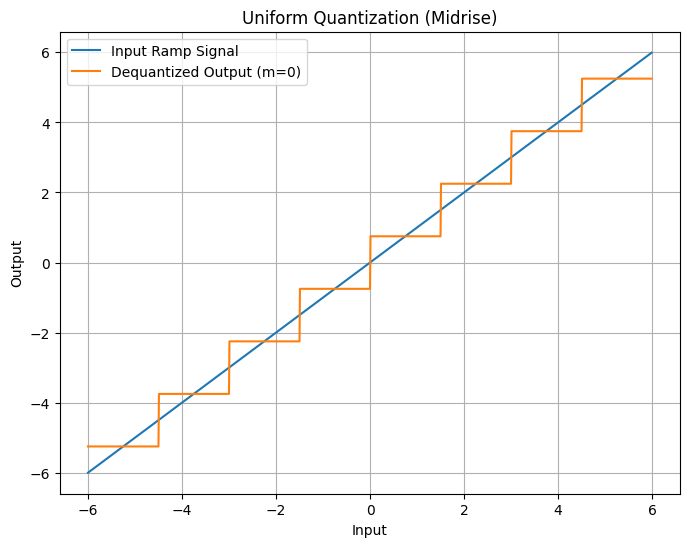

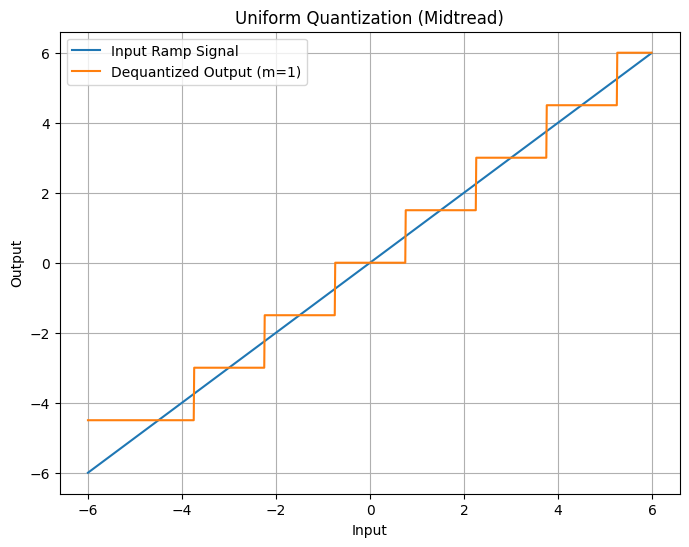

In [15]:
ramp_test()

# Requirement Four

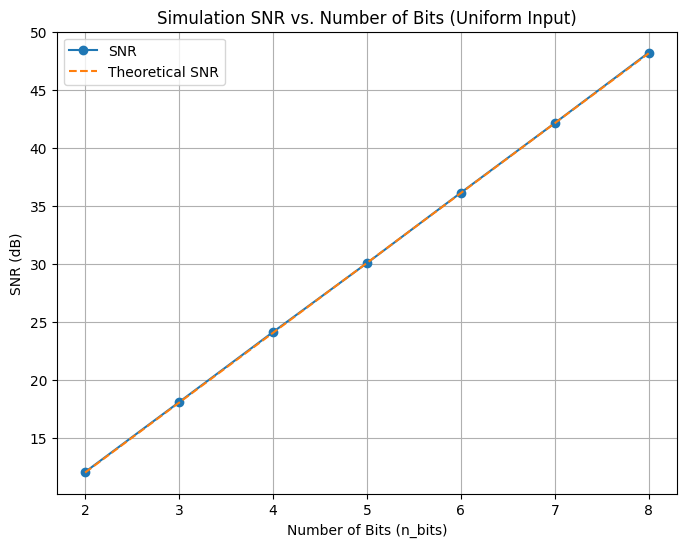

In [16]:
def random_test():
    input_signal = np.random.uniform(low=-5, high=5, size=10000)

    xmax = 5
    m = 0
    n_bits_range = range(2, 9)
    snr_values = []
    theoretical_snr = []
    # Calculate SNR and quantization error for each n_bits
    for n_bits in n_bits_range:
        q_ind = UniformQuantizer(input_signal, n_bits, xmax, m)
        deq_val = UniformDequantizer(q_ind, n_bits, xmax, m)
        quantization_error = input_signal - deq_val

        E_x2 = np.mean(input_signal**2)
        E_error2 = np.mean(quantization_error**2)
        snr_values.append(E_x2 / E_error2)
        theoretical_snr.append((3 * (2**n_bits) ** 2 * E_x2) / xmax**2)
    # Plot SNR vs n_bits
    plot_SNR(
        n_bits_range,
        [10 * np.log10(snr_values)],
        [10 * np.log10(theoretical_snr)],
        ["SNR"],
        ["Theoretical SNR"],
        "Number of Bits (n_bits)",
        "SNR (dB)",
        "Simulation SNR vs. Number of Bits (Uniform Input)",
    )


random_test()

# Requirement Five

In [17]:
num_samples = 10000
polarity = np.random.choice([-1, 1], size=num_samples, p=[0.5, 0.5])
magnitude = np.random.exponential(size=num_samples)
input_signal = polarity * magnitude

xmax = max(abs(input_signal))
m = 0
n_bits_range = range(2, 9)

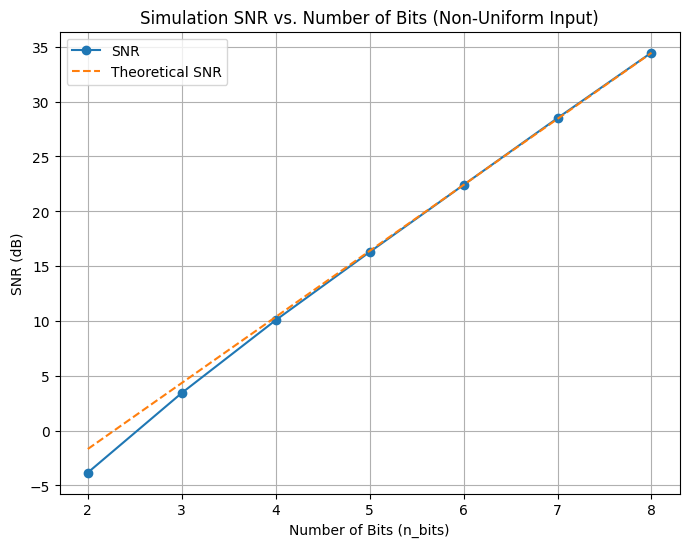

In [18]:
def exponential_test():
    snr_values = []
    theoretical_snr = []
    for n_bits in n_bits_range:
        q_ind = UniformQuantizer(input_signal, n_bits, xmax, m)
        deq_val = UniformDequantizer(q_ind, n_bits, xmax, m)
        quantization_error = input_signal - deq_val
        E_x2 = np.mean(input_signal**2)
        E_error2 = np.mean(quantization_error**2)
        snr = E_x2 / E_error2
        snr_values.append(snr)
        theoretical_snr.append((3 * (2**n_bits) ** 2 * E_x2) / xmax**2)

    # Plot SNR vs n_bits
    plot_SNR(
        n_bits_range,
        [10 * np.log10(snr_values)],
        [10 * np.log10(theoretical_snr)],
        ["SNR"],
        ["Theoretical SNR"],
        "Number of Bits (n_bits)",
        "SNR (dB)",
        "Simulation SNR vs. Number of Bits (Non-Uniform Input)",
    )


exponential_test()

# Requirement Six

In [19]:
def mu_law_compression(normalized_x, mu):
    return np.sign(normalized_x) * (np.log1p(mu * np.abs(normalized_x)) / np.log1p(mu))


def mu_law_expansion(y, mu):
    return np.sign(y) * ((1 + mu) ** np.abs(y) - 1) / mu

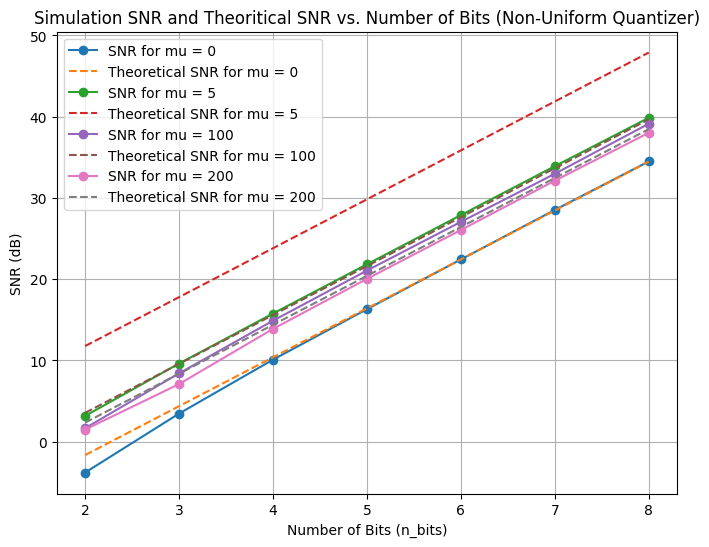

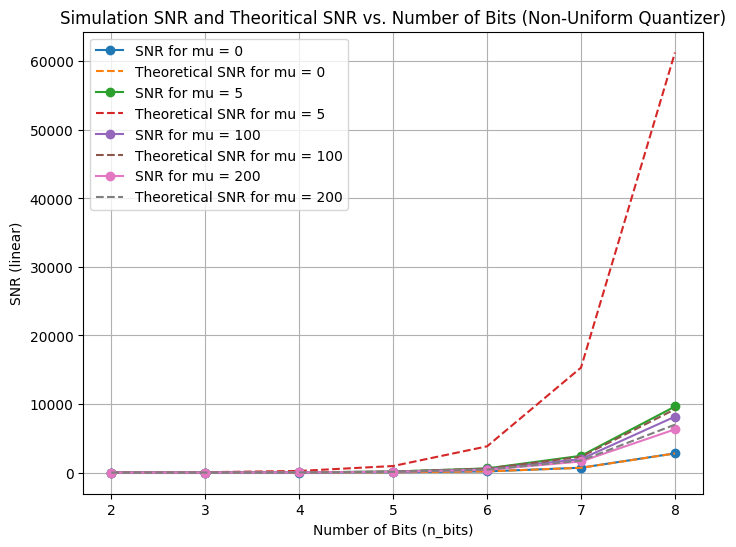

In [20]:
def final_test():
    mu_values = [0, 5, 100, 200]
    Sim_SNR = []
    Theor_SNR = []
    for mu in mu_values:
        snr_values = []
        theoretical_snr = []
        for n_bits in n_bits_range:
            in_sig = input_signal
            if mu > 0:
                in_sig = mu_law_compression(input_signal / xmax, mu)
            q_ind = UniformQuantizer(in_sig, n_bits, np.max(abs(in_sig)), 0)
            deq_val = UniformDequantizer(q_ind, n_bits, np.max(abs(in_sig)), 0)
            if mu > 0:
                deq_val = mu_law_expansion(deq_val, mu) * xmax

            quantization_error = input_signal - deq_val

            E_x2 = np.mean(input_signal**2)
            E_error2 = np.mean(quantization_error**2)
            snr = E_x2 / E_error2
            snr_values.append(snr)

            if mu > 0:
                theoretical_snr.append((3 * (2**n_bits) ** 2) / (np.log1p(mu) ** 2))
            else:
                theoretical_snr.append((3 * (2**n_bits) ** 2 * E_x2) / xmax**2)
        Sim_SNR.append(snr_values)
        Theor_SNR.append(theoretical_snr)

    # Plot SNR vs n_bits
    Sim_labels = [
        "SNR for mu = 0",
        "SNR for mu = 5",
        "SNR for mu = 100",
        "SNR for mu = 200",
    ]
    Theo_labels = [
        "Theoretical SNR for mu = 0",
        "Theoretical SNR for mu = 5",
        "Theoretical SNR for mu = 100",
        "Theoretical SNR for mu = 200",
    ]
    plot_SNR(
        n_bits_range,
        10 * np.log10(Sim_SNR),
        10 * np.log10(Theor_SNR),
        Sim_labels,
        Theo_labels,
        "Number of Bits (n_bits)",
        "SNR (dB)",
        "Simulation SNR and Theoritical SNR vs. Number of Bits (Non-Uniform Quantizer)",
    )
    plot_SNR(
        n_bits_range,
        Sim_SNR,
        Theor_SNR,
        Sim_labels,
        Theo_labels,
        "Number of Bits (n_bits)",
        "SNR (linear)",
        "Simulation SNR and Theoritical SNR vs. Number of Bits (Non-Uniform Quantizer)",
    )


final_test()